In [1]:
import numpy as np  
import matplotlib.pyplot as plt  

import pandas as pd  

import os
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline
import matlab.engine

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:

#ran=1;%for GBM
#ran=5;%for KNN
#Please manually change in Matlab code reading_hotspot2Data_v3
os.getcwd()
os.chdir('/Users/sitani/Desktop/CS_final_codes/workonhotspots/')
eng = matlab.engine.start_matlab()
eng.reading_hotspot2Data_v3(nargout=0)
os.chdir('/Users/sitani/Desktop/CS_final_codes/workonhotspots/FinalCodesForPublication/')
os.getcwd()

'/Users/sitani/Desktop/CS_final_codes/workonhotspots/FinalCodesForPublication'

In [3]:
eng.quit()

In [4]:
X=pd.read_csv('Atrain_whole.csv',header=None)
y=pd.read_csv('label_whole.csv',header=None)

X_train = pd.read_csv('Atrain2.csv',header=None)
X_valid = pd.read_csv('Avalid2.csv',header=None)

y_train=pd.read_csv('label_train2.csv',header=None)
y_valid=pd.read_csv('label_valid2.csv',header=None)

X_test=pd.read_csv('Atest2.csv',header=None)
y_test=pd.read_csv('label_test2.csv',header=None)

X_train=X_train.T#transpose
X_valid=X_valid.T
X=X.T
X_test=X_test.T

y_train=y_train.values.ravel()
y_valid=y_valid.values.ravel()
y=y.values.ravel()
y_test=y_test.values.ravel()

print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(250, 58)
(63, 58)
(250,)
(63,)


In [5]:
from sklearn.grid_search import GridSearchCV

/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [6]:
# define the parameter values that should be searched
k_range = list(range(1, 40))

# Another parameter besides k that we might vary is the weights parameters
# default options --> uniform (all points in the neighborhood are weighted equally)
# another option --> distance (weights closer neighbors more heavily than further neighbors)

# we create a list
weight_options = ['uniform', 'distance']
#weight_options = ['uniform']
score=['accuracy','f1','precision','recall','roc_auc']


In [7]:
# create a parameter grid: map the parameter names to the values that should be searched
# dictionary = dict(key=values, key=values)
param_grid = dict(n_neighbors=k_range, weights=weight_options)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39], 'weights': ['uniform', 'distance']}


In [8]:
# instantiate and fit the grid
# exhaustive grid-search because it's trying every combination
# 10-fold cross-validation is being performed 30 x 2 = 60 times
knn=KNeighborsClassifier(n_neighbors=5)
grid = GridSearchCV(knn, param_grid, cv=5,scoring='recall')
grid.fit(X, y)


GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, scoring='recall', verbose=0)

In [9]:
# view the complete results
grid.grid_scores_, grid.best_params_, grid.best_score_,
#grid.grid_scores_(min(mean))

([mean: 0.62399, std: 0.05445, params: {'n_neighbors': 1, 'weights': 'uniform'},
  mean: 0.62399, std: 0.05445, params: {'n_neighbors': 1, 'weights': 'distance'},
  mean: 0.37519, std: 0.09965, params: {'n_neighbors': 2, 'weights': 'uniform'},
  mean: 0.62399, std: 0.05445, params: {'n_neighbors': 2, 'weights': 'distance'},
  mean: 0.62349, std: 0.08424, params: {'n_neighbors': 3, 'weights': 'uniform'},
  mean: 0.63857, std: 0.08950, params: {'n_neighbors': 3, 'weights': 'distance'},
  mean: 0.44327, std: 0.12838, params: {'n_neighbors': 4, 'weights': 'uniform'},
  mean: 0.65381, std: 0.05934, params: {'n_neighbors': 4, 'weights': 'distance'},
  mean: 0.60064, std: 0.13630, params: {'n_neighbors': 5, 'weights': 'uniform'},
  mean: 0.62333, std: 0.12324, params: {'n_neighbors': 5, 'weights': 'distance'},
  mean: 0.47325, std: 0.13780, params: {'n_neighbors': 6, 'weights': 'uniform'},
  mean: 0.65348, std: 0.11318, params: {'n_neighbors': 6, 'weights': 'distance'},
  mean: 0.57844, std: 

In [10]:
# train your model using all data and the best known parameters
param1=grid.best_params_["n_neighbors"]
param2=grid.best_params_["weights"]
# instantiate model with best parameters

knn = KNeighborsClassifier(n_neighbors=param1, weights=param2)

# fit with X and y, not X_train and y_train
# even if we use train/valid split, we should train on X and y before making predictions on new data
# otherwise we throw away potential valuable data we can learn from
knn.fit(X, y)


print(grid.best_score_)
print(grid.best_params_)
#grid.best_params_["n_neighbors"]
# Best score did not improve for this model

0.653805193741296
{'n_neighbors': 4, 'weights': 'distance'}


In [11]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)
#grid.best_params_["n_neighbors"]
# Best score did not improve for this model

0.653805193741296
{'n_neighbors': 4, 'weights': 'distance'}


In [12]:
knn = KNeighborsClassifier(n_neighbors=param1, weights=param2)

knn.fit(X, y)

Acc=cross_val_score(knn, X, y, scoring='accuracy',
          cv=5)
 
print('Accuracy: %.3f' % Acc.mean() )

Sen=cross_val_score(knn, X, y, scoring='recall',
          cv=5)
Sen.mean()  
print('Sensitivity: %.3f' % Sen.mean() )
Prec=cross_val_score(knn, X, y, scoring='precision',
          cv=5)
Prec.mean()  
print('Prec: %.3f' % Prec.mean() )
F1=cross_val_score(knn, X, y, scoring='f1',
          cv=5)
F1.mean()  
print('F1: %.3f' % F1.mean() )
AUC=cross_val_score(knn, X, y, scoring='roc_auc',
          cv=5)
AUC.mean()  
print('AUC: %.3f' % AUC.mean() )


Accuracy: 0.690
Sensitivity: 0.654
Prec: 0.646
F1: 0.643
AUC: 0.712


In [13]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer
import math

def tn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 0]
def fp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 1]
def fn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 0]
def tp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 1]

scoring = {'tp': make_scorer(tp), 'tn': make_scorer(tn),
           'fp': make_scorer(fp), 'fn': make_scorer(fn)}
cv_results = cross_validate(knn.fit(X, y), X, y,
                           scoring=scoring, cv=5)
tp=cv_results['test_tp'].mean()
fp=cv_results['test_fp'].mean()
tn=cv_results['test_tn'].mean()
fn=cv_results['test_fn'].mean()
print('tp: %.3f' % tp)
print('\n')
print('tn: %.3f' % tn)
print('\n')
print('fp: %.3f' % fp)
print('\n')
print('fn: %.3f' % fn)
print('\n')

specificity=tn/(tn+fp)
print('Specificity: %.3f' %specificity)

MCC= (tp*tn-fp*fn)/(math.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)))
print('MCC:%.3f' %MCC)

tp: 17.400


tn: 25.800


fp: 10.200


fn: 9.200


Specificity: 0.717
MCC:0.369


In [17]:
%matplotlib inline
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
#knn.fit(X,y)
knn = KNeighborsClassifier(n_neighbors=4, weights='distance')



knn.fit(X, y)
y_test_pred = knn.predict(X_test) 
knn_roc_auc = roc_auc_score(y_test, y_test_pred)

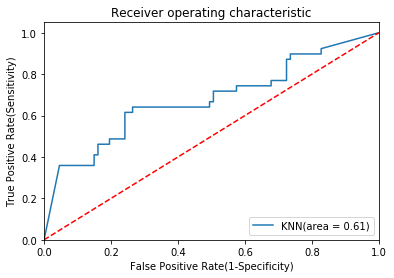

In [18]:


# predict probabilities

probs = knn.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.figure()
plt.plot(fpr, tpr, label='KNN(area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(1-Specificity)')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

In [19]:
from sklearn.metrics import confusion_matrix 
print('Accuracy of KNN classifier: {:.2f}'.format(knn.score(X_test, y_test)))
print('\n')
confusion_df = pd.DataFrame(confusion_matrix(y_test,y_test_pred),
             columns=["Predicted Class " + str(class_name) for class_name in [1,0]],
             index = ["Class " + str(class_name) for class_name in [1,0]])

print('Confusion matrix : \n',confusion_df.T)
print('\n')


cm1 = confusion_matrix(y_test, y_test_pred).T
print('\n')
total1=sum(sum(cm1))
print(cm1)
#####from confusion matrix calculate sensitivity specificity

tn=confusion_matrix(y_test, y_test_pred)[0, 0]
fp=confusion_matrix(y_test, y_test_pred)[0, 1]
fn=confusion_matrix(y_test, y_test_pred)[1, 0]
tp=confusion_matrix(y_test, y_test_pred)[1, 1]
#sensitivity1=tp/(tp+fn)

#print('Sensitivity :', sensitivity1 )
#print('\n')

specificity1=tn/(tn+fp)
print('Specificity :', specificity1)
print('\n')
#precision=tp/(tp+fp)
#precision = cm1[0,0]/(cm1[0,0]+cm1[0,1])
#print('precision :', precision)
#print('\n')
from sklearn.metrics import precision_score
print("Precision score: {}".format(precision_score(y_test,y_test_pred)))
print('\n')
from sklearn.metrics import recall_score
print("Recall or Sensitivity: {}".format(recall_score(y_test,y_test_pred)))
print('\n')
from sklearn.metrics import f1_score
print("F1 Score: {}".format(f1_score(y_test,y_test_pred)))
print('\n')
from sklearn.metrics import matthews_corrcoef
print("Matthews Correlation Coefficient: {}".format(matthews_corrcoef(y_test, y_test_pred)))
print('\n')
##Area under Curve-AUC
auc = roc_auc_score(y_test, knn.predict_proba(X_test)[:,1])
print('AUC: %.3f' % auc)
print('\n')

Accuracy of KNN classifier: 0.60


Confusion matrix : 
                    Class 1  Class 0
Predicted Class 1       51       14
Predicted Class 0       36       25




[[51 14]
 [36 25]]
Specificity : 0.5862068965517241


Precision score: 0.4098360655737705


Recall or Sensitivity: 0.6410256410256411


F1 Score: 0.5


Matthews Correlation Coefficient: 0.21020394016782923


AUC: 0.678


